Medical Insurance Price Prediction Model

Importing the Dependencies

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# %matplotlib inline
warnings.filterwarnings('ignore')

Data Collection & Analysis

In [58]:
# loading the data from csv file to Pandas Dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [59]:
# first 5 row of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [61]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [62]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [63]:
# statistical measures for the dataset
insurance_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


EDA and Visualizations

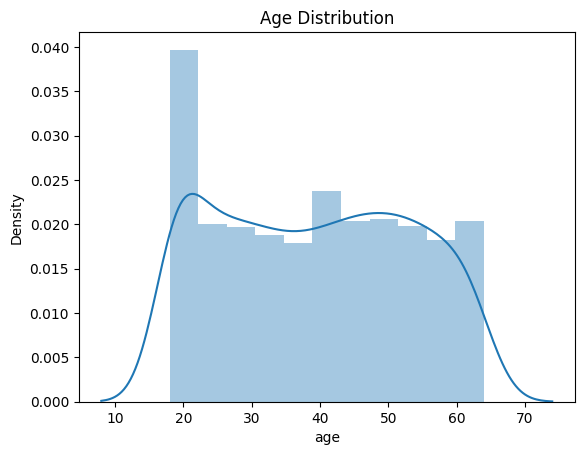

In [64]:
# distribution of age value
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

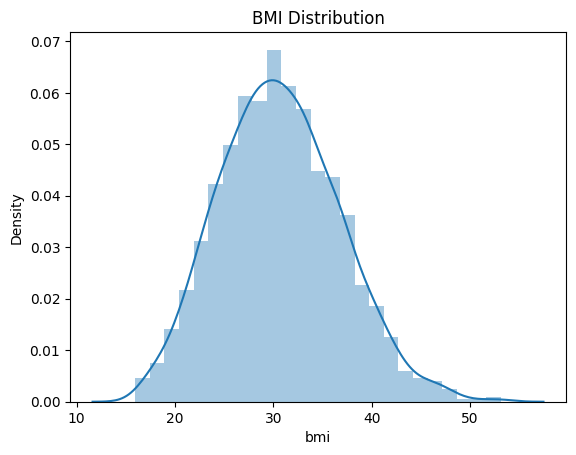

In [65]:
# BMI Distribution
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

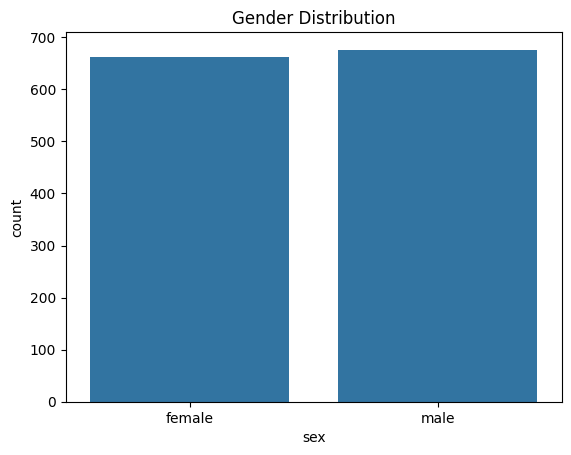

In [66]:
# Gender column
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [67]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

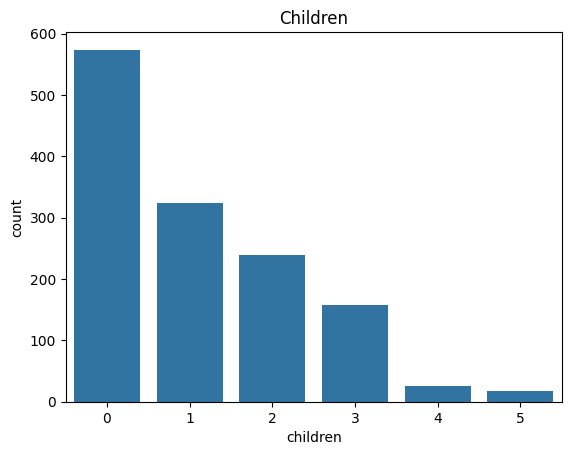

In [68]:
# Children column
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

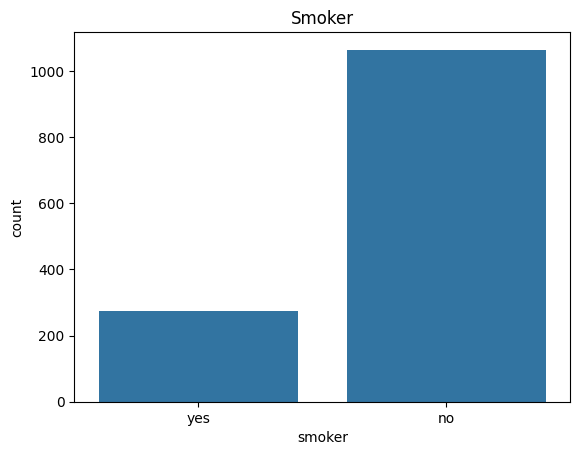

In [69]:
# Smoker column
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [70]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

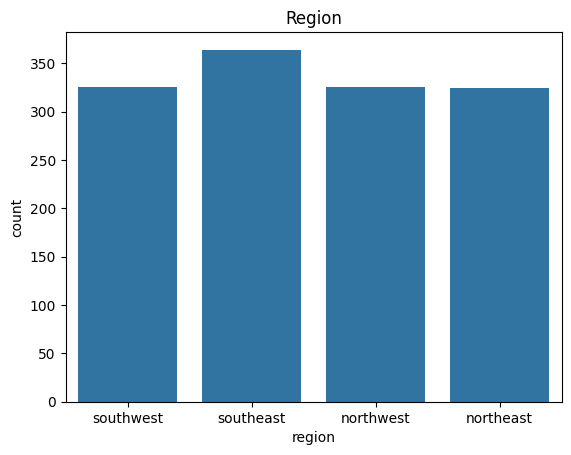

In [71]:
# Region column
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [72]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

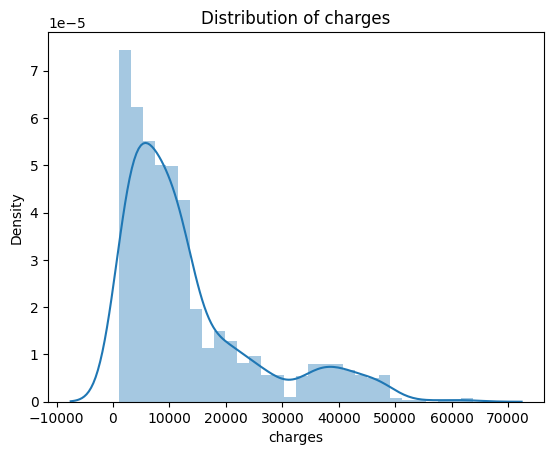

In [73]:
# Distribution of charges column
sns.distplot(insurance_dataset['charges'])
plt.title('Distribution of charges')
plt.show()

Data Pre-Processing

Encoding the categorical feature

In [74]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


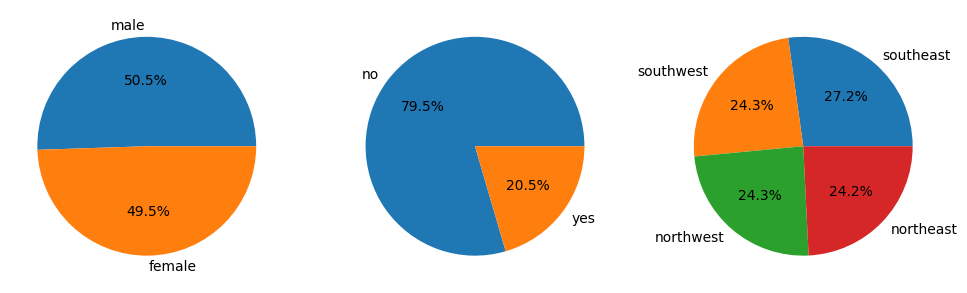

In [75]:
plt.figure(figsize=(12,4))

features = ['sex', 'smoker', 'region']

for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    x=insurance_dataset[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

In [76]:
# Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [77]:
label = LabelEncoder()

In [78]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
insurance_dataset['sex']=label.fit_transform(insurance_dataset['sex'])

In [80]:
insurance_dataset['smoker']=label.fit_transform(insurance_dataset['smoker'])

In [81]:
insurance_dataset['region']=label.fit_transform(insurance_dataset['region'])

In [82]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


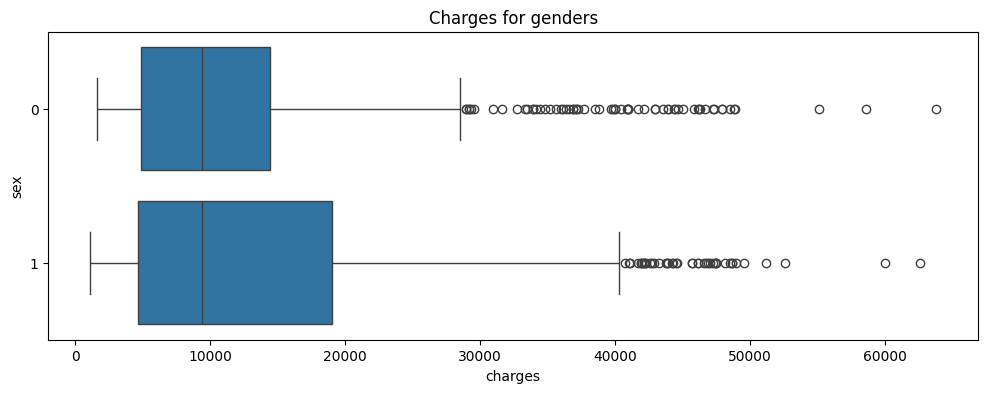

In [83]:
plt.figure(figsize=(12,4))
sns.boxplot(x='charges',y='sex',data=insurance_dataset, orient='h')
plt.title('Charges for genders')
plt.show()

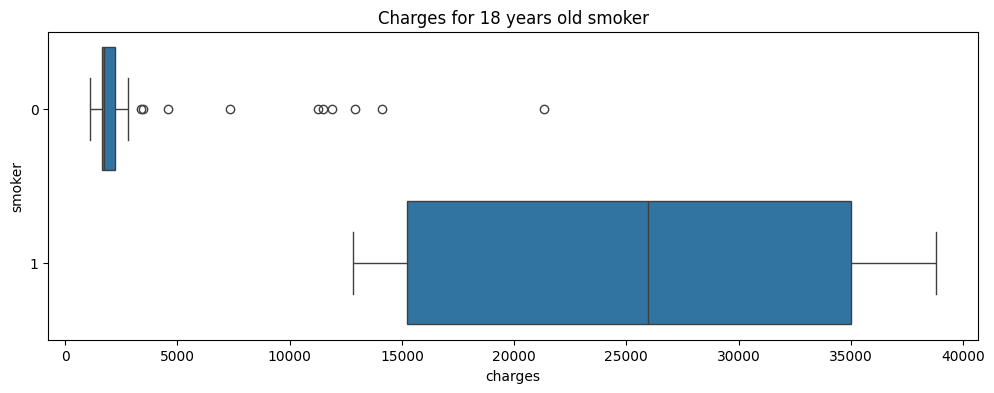

In [84]:
plt.figure(figsize=(12,4))
sns.boxplot(x='charges',y='smoker',data=insurance_dataset[(insurance_dataset.age==18)], orient="h")
plt.title('Charges for 18 years old smoker')
plt.show()

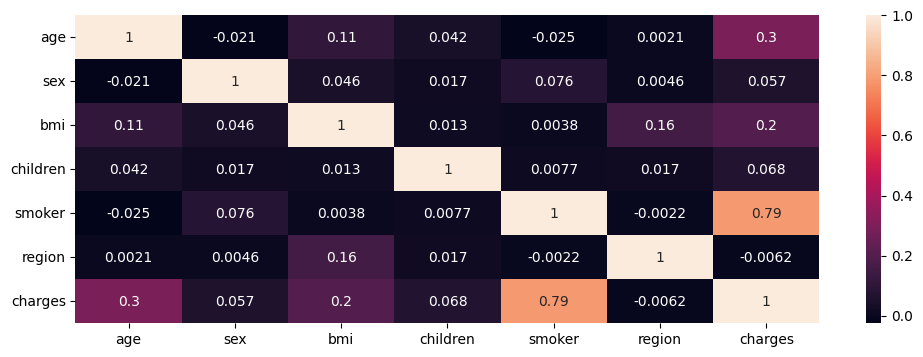

In [85]:
plt.figure(figsize=(12,4))
sns.heatmap(insurance_dataset.corr(),annot=True)
plt.show()

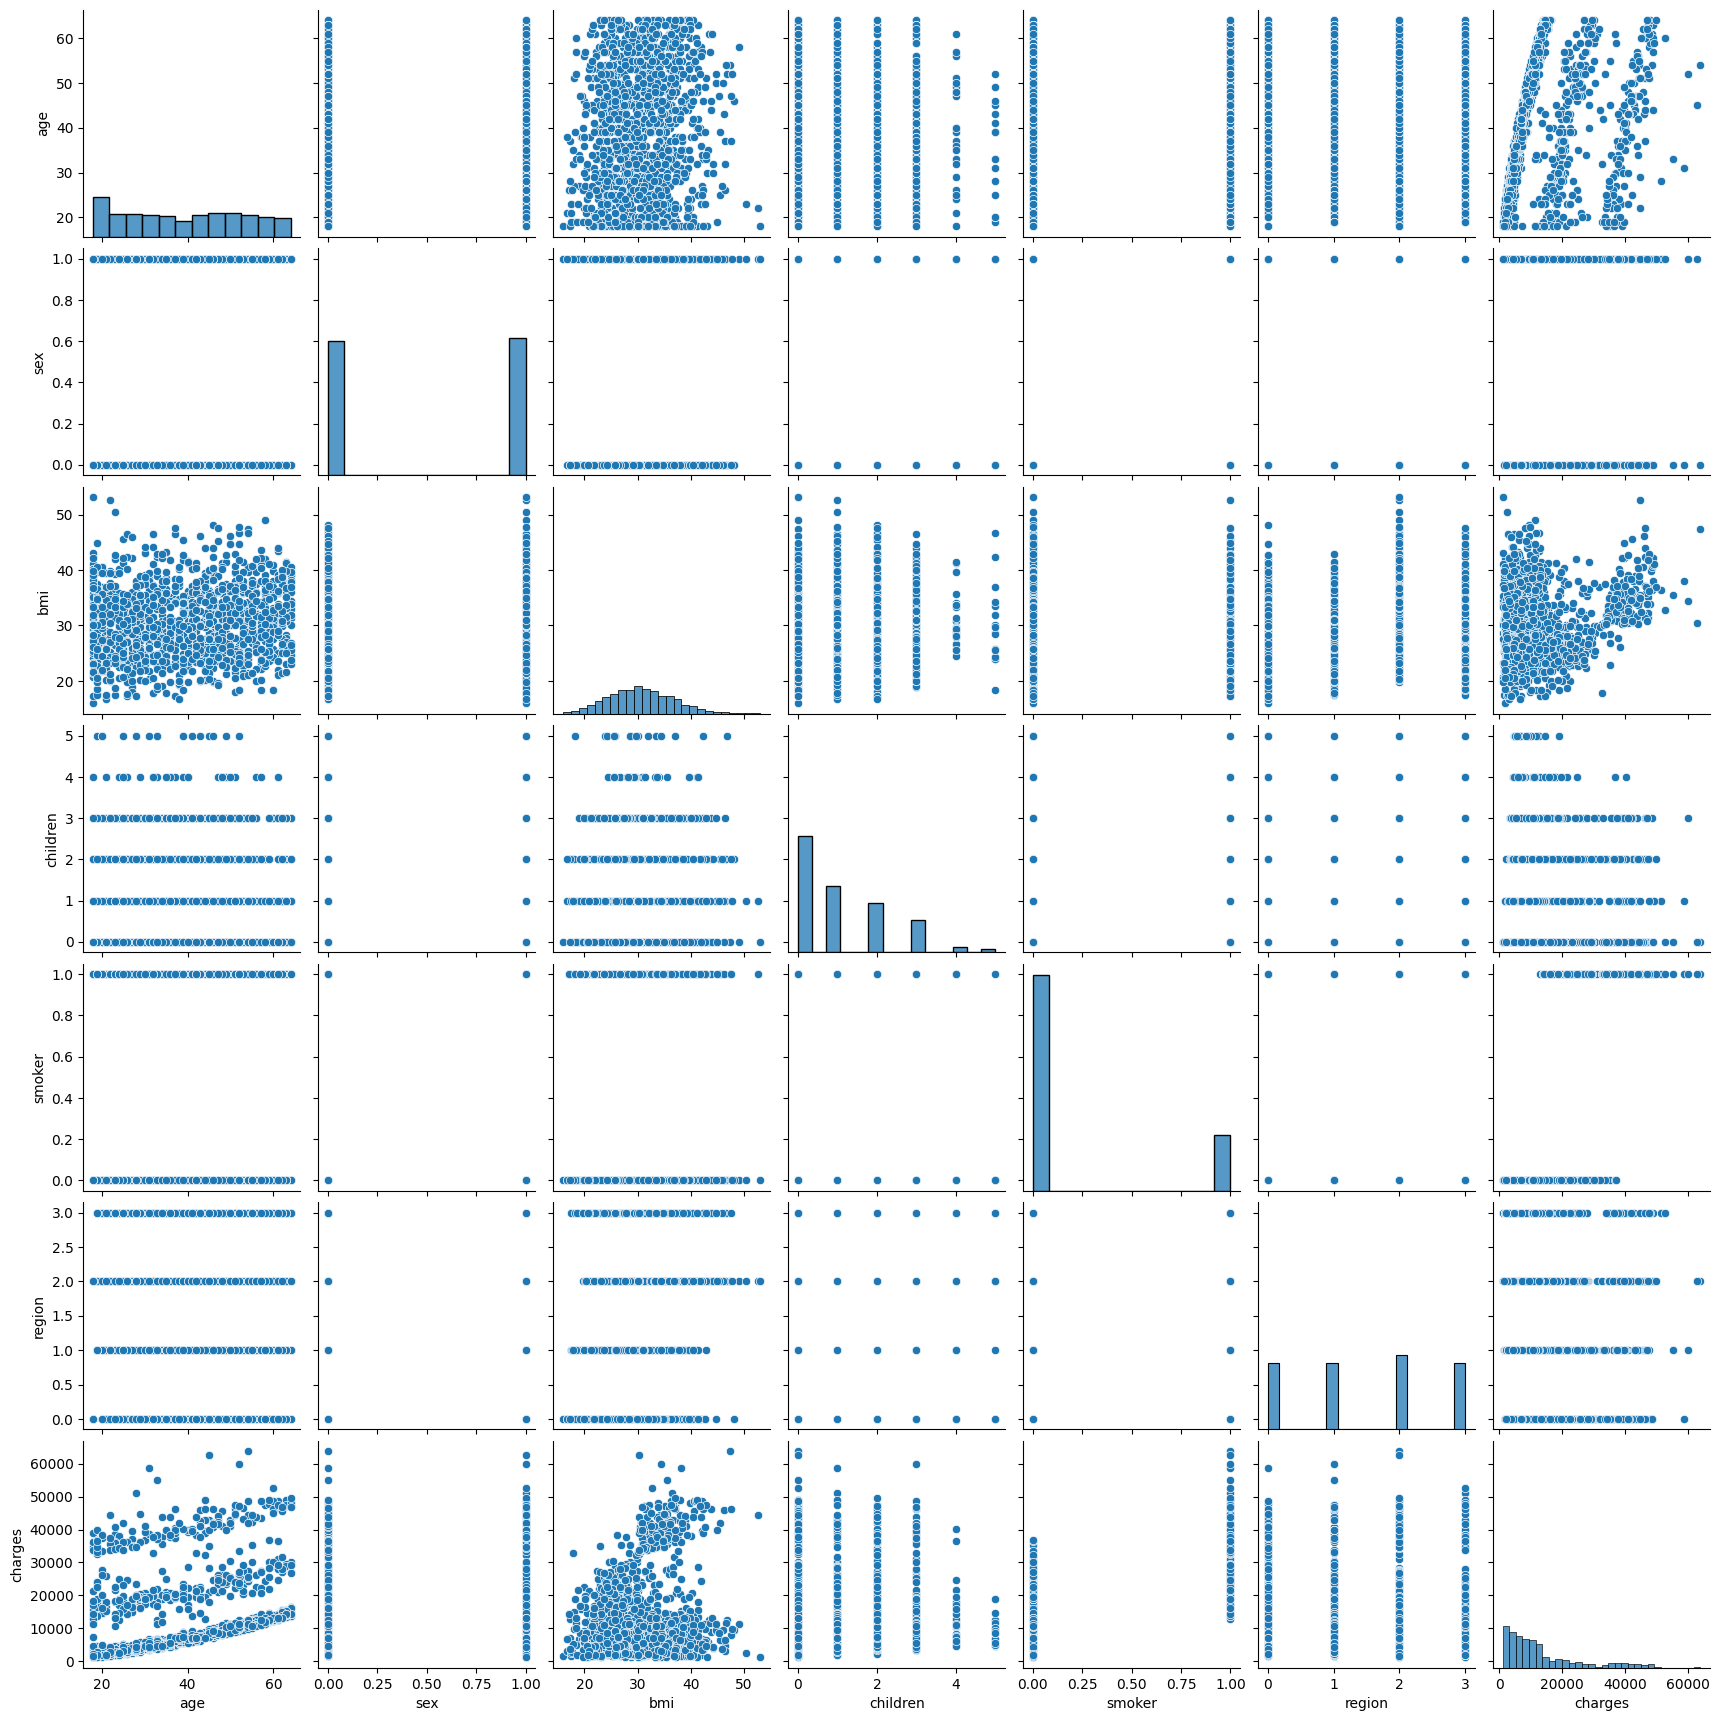

In [86]:
#plt.figure(figsize=(12,4))
sns.pairplot(insurance_dataset)
plt.show()

Splitting the Features and Target

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x = insurance_dataset.drop(['charges'],axis=1)
y = insurance_dataset['charges']

In [89]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [90]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
x_train.value_counts()

age  sex  bmi     children  smoker  region
18   0    38.280  0         0       2         2
          30.115  0         0       0         2
          20.790  0         0       2         1
48   0    27.265  1         0       0         1
          31.130  0         0       2         1
                                             ..
31   1    31.065  3         0       1         1
          39.490  1         0       2         1
32   0    20.520  0         0       0         1
          23.650  1         0       2         1
64   1    39.160  1         0       2         1
Name: count, Length: 1068, dtype: int64

In [93]:
x_test.value_counts()

age  sex  bmi     children  smoker  region
18   0    26.315  0         0       0         1
47   1    25.410  1         1       2         1
45   0    25.700  3         0       3         1
          38.285  0         0       0         1
     1    39.805  0         0       0         1
                                             ..
30   1    25.460  0         0       0         1
          31.570  3         0       2         1
          44.220  2         0       2         1
31   0    29.100  0         0       3         1
64   1    40.480  0         0       2         1
Name: count, Length: 268, dtype: int64

In [94]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [95]:
print(y.shape,y_train.shape,y_test.shape)

(1338,) (1070,) (268,)


Model Training

Compare Between Models

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
from sklearn.metrics import r2_score

In [98]:
models = {
    "LR":LinearRegression(),
    "RF":RandomForestRegressor(),
    "DT":DecisionTreeRegressor(),
    "GB":GradientBoostingRegressor(),
    "KNN":KNeighborsRegressor(),
    "SVR":SVR()
}

In [99]:
for name, model in models.items():
  print(model)

LinearRegression()
RandomForestRegressor()
DecisionTreeRegressor()
GradientBoostingRegressor()
KNeighborsRegressor()
SVR()


In [100]:
for name, model in models.items():
  print(f'Training model : {name} \n')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)

  # regression metrics
  print(f'Training Score is : {model.score(x_train,y_train)}')
  print(f'Testing Score is : {model.score(x_test,y_test)}\n')
  print(f'Training R2 Score is : {r2_score(y_train,model.predict(x_train))}')
  print(f'Testing R2 Score is : {r2_score(y_test,y_pred)}')
  print("--------------------------------------")

Training model : LR 

Training Score is : 0.7417049283233981
Testing Score is : 0.7833463107364539

Training R2 Score is : 0.7417049283233981
Testing R2 Score is : 0.7833463107364539
--------------------------------------
Training model : RF 

Training Score is : 0.9749358881073775
Testing Score is : 0.8636888876592645

Training R2 Score is : 0.9749358881073775
Testing R2 Score is : 0.8636888876592645
--------------------------------------
Training model : DT 

Training Score is : 0.9983078124756305
Testing Score is : 0.7239009167688757

Training R2 Score is : 0.9983078124756305
Testing R2 Score is : 0.7239009167688757
--------------------------------------
Training model : GB 

Training Score is : 0.8980459663933704
Testing Score is : 0.877993618163719

Training R2 Score is : 0.8980459663933704
Testing R2 Score is : 0.877993618163719
--------------------------------------
Training model : KNN 

Training Score is : 0.39376796951019544
Testing Score is : 0.14450414235747

Training R2 Sc

Based on the provided scores, the best prediction model is the **Gradient Boosting Regressor (GB)**

In [101]:
final_model = GradientBoostingRegressor()

In [102]:
final_model.fit(x_train,y_train)

GradientBoostingRegressor()

Model Evaluation

In [103]:
y_pred = final_model.predict(x_test)

In [104]:
# training data r2 score
print(f'Training R2 Score is : {r2_score(y_train,final_model.predict(x_train))}')

Training R2 Score is : 0.8980459663933704


In [105]:
# testing data r2 score
print(f'Testing R2 Score is : {r2_score(y_test,y_pred)}')

Testing R2 Score is : 0.8779726251291786


In [106]:
x_test.head()

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1


Building a Predictive System

In [107]:
input_data = (19,0,27.900,0,1,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[17792.46608893]
The insurance cost is USD  17792.466088925983


In [108]:
# Create a joblib file
import joblib

In [109]:
joblib.dump(final_model,'insurance.joblib')

['insurance.joblib']